<a href="https://colab.research.google.com/github/aiaurora/Lobe-TFLite_image-test/blob/main/lobe_python_1(images).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

加入LOBE的Libraries，執行完要Restart Runtime

In [ ]:
#執行完這一行，要記得restart runtime!!
!pip install git+https://github.com/lobe/lobe-python

  Cloning https://github.com/lobe/lobe-python to /tmp/pip-req-build-4st504et
  Running command git clone -q https://github.com/lobe/lobe-python /tmp/pip-req-build-4st504et
     |████████████████████████████████| 1.2 MB 30.1 MB/s 
     |████████████████████████████████| 3.0 MB 33.7 MB/s 
     |████████████████████████████████| 4.1 MB 52.8 MB/s 
  Created wheel for lobe: filename=lobe-0.4.0-py3-none-any.whl size=14369 sha256=b309da42d70e39b9732073b4a47006dbb34d45e486926d8f3c61dc751675670a
  Stored in directory: /tmp/pip-ephem-wheel-cache-f86nw2yj/wheels/70/ed/9e/94a08979adcf840a32f3c76cdc78118a8b10bb698ae69a11be
Successfully built lobe
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires 

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


連結雲端硬碟(授權)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#進行授權

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


確認目錄內容

In [ ]:
import os
path = '/content/drive/MyDrive/Colab Notebooks/LOBE/1'  #切換目錄
os.chdir(path)
os.listdir()  #確認目錄內容

['signature.json', 'saved_model.tflite', 'labels.gdoc', 'images']

使用LOBE TFLite Model進行預測

A：
河狸: 99.98996257781982%
海獺: 0.006848165503470227%
水獺: 0.00318412458000239%


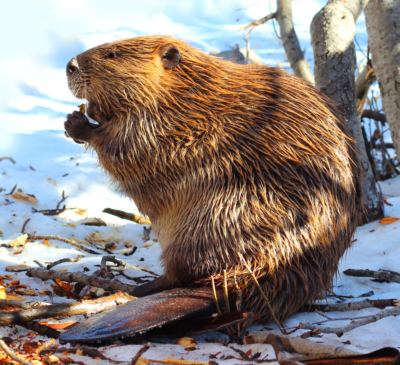


B：
海獺: 99.99963045120239%
水獺: 0.00022957276542001637%
河狸: 0.00013976084574096603%


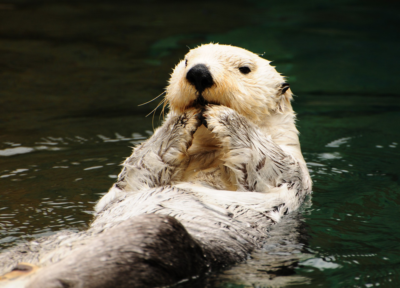


C：
水獺: 99.99518394470215%
海獺: 0.0039336460758931935%
河狸: 0.0008811352017801255%


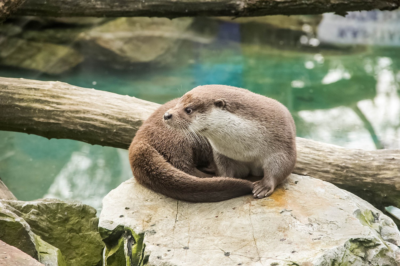

In [ ]:
#import tensorflow as tf
from PIL import Image
from lobe import ImageModel

width = 400  #統一寬度並等比例縮放
im1 = Image.open(path+'/images/A.jpg')
ratio = float(width)/im1.size[0]
height = int(im1.size[1]*ratio)
im1a = im1.resize( (width, height), Image.BILINEAR )

im2 = Image.open(path+'/images/B.jpg')
ratio = float(width)/im2.size[0]
height = int(im2.size[1]*ratio)
im2a = im2.resize( (width, height), Image.BILINEAR )

im3 = Image.open(path+'/images/C.jpg')
ratio = float(width)/im3.size[0]
height = int(im3.size[1]*ratio)
im3a = im3.resize( (width, height), Image.BILINEAR )


model = ImageModel.load(path)
result1 = model.predict_from_file(path+'/images/A.jpg')
result2 = model.predict_from_file(path+'/images/B.jpg')
result3 = model.predict_from_file(path+'/images/C.jpg')

# Print all classes
print("A：")
for label, confidence in result1.labels:
    print(f"{label}: {confidence*100}%")
im1a.show()

print("\nB：")
for label, confidence in result2.labels:
    print(f"{label}: {confidence*100}%")
im2a.show()

print("\nC：")
for label, confidence in result3.labels:
    print(f"{label}: {confidence*100}%")
im3a.show()